# 1 OLS, polynomial toy model, and motivation for Ridge

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import fixed

### 1.1 Ordinary Least Square (OLS)

Recall that for Ordinary Least Squares, our goal is to minimize the squared error of our predicitons. For each data point $\vec{x}_i$, we try to minimize the square of the difference between our prediction, $\hat{y_i} = \vec{x}_i^T\vec{w}$, and the actual value, $y_i$. This can be formulated as the following:  \\

Optimization Problem: $\underset{\lambda}{\text{min }} \|y - Xw \|_2^2$

Closed Form Solution: $\hat{w} = (X^TX)^{-1}X^T\vec{y}$

Notice here that the matrix $X$ contains $n$ rows of training points stacked on top of each other: $X = 
\begin{bmatrix}
- \vec{x}_1^T -\\
- \vec{x}_2^T -\\
... \\
- \vec{x}_n^T -
\end{bmatrix}$

**1.1.1. Implement the closed form solution for OLS below:**

In [ ]:
def ols(X, y):
    ### BEGIN CODE ###
    w_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    ### END CODE ###
    return w_hat

## 1.2 Toy Model and Polynomial Regression

Let us assume we have a polynomial function, $y=f(x)$ where $x$ and $y$ are both scalars. We want to learn a model that can predict $y$ given an $x$ using polynomial regression.

We're given training x values of $x_1, x_2,...x_n$ and y values of $y_1, y_2,...y_n$. In the real world, collecting perfect data is impossible, and thus our y-values can be slightly off from the true function. We refer to this as **noise** in the data:

$y_i = f(x_i) + \delta_i$ where $\delta_i$ is the noise for the $i^{th}$ training point. It is out of scope for now to understand what values $\delta_i$ can take on. For now, all you need to know is that $\delta_i$ is unpredictable and somewhat small, but you will see shortly how it can affect the training of our model.

---

In order to perform polynomial regression, we need to lift the $x_i$ scalars into degree-$d$ polynomial features: $\vec{x_i} = [x_i^0, x_i^1, x_i^2, ..., x_i^d]^T$

The $X$ matrix as previously defined now consists of the $n$ feature vectors of training points stacked on top of each other: $X = 
\begin{bmatrix}
- \vec{x}_1^T -\\
- \vec{x}_2^T -\\
... \\
- \vec{x}_n^T -
\end{bmatrix}$

**1.2.1. Run the cell below to generate and visualize our training data, and answer the questions in the next cell.**

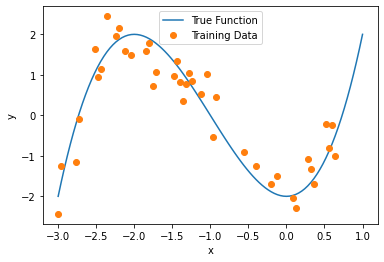

In [ ]:
def generate_data(x_range, func, sigma=1, n=80):
    y_range = np.array([func(x) + np.random.normal(0, sigma) for x in x_range])
    random_indicies = np.arange(len(x_range))
    np.random.shuffle(random_indicies)
    x = x_range[random_indicies[:n]]
    y = y_range[random_indicies[:n]]
    return x, y

def get_features(d, x_scalars):
    X = []
    for x in x_scalars:
        X.append([x**i for i in range(d+1)])
    return np.array(X)


# Don't overwrite these values as it was kinda hard to find a good example where
# ridge actually helped, just comment this out and put in a different example if
# you want to test on other functions/x_ranges

x_range = np.linspace(-3, 1, 101, endpoint=True)
func = lambda x: x**3 + 3*x**2 - 2
np.random.seed(123)
x, y = generate_data(x_range, func, 0.4, 80)

# Training and validation set split, we'll just use 50/50 in this case
N = 40
x_train = x[:N] 
y_train = y[:N]
x_test = x[N:]
y_test = y[N:]

plt.plot(x_range, func(x_range), label='True Function')
plt.plot(x_train, y_train, 'o', label='Training Data')
plt.plot()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Read and understand the code above, and then answer these questions:

**1.2.2. What is the true function we are trying to model? This is the $f(x)$ in $y_i = f(x_i) + \delta_i$**

ANSWER: $f(x)=x^3+3x^2-2$

**1.2.3. Say we used a degree 5 polynomial to perform polynomial regression, what is the true weight vector $\vec{w}$ such that $f(x) = \vec{x}^T\vec{w}$? Recall that $\vec{x}$ is a vector with degree 5 polynomial features $\vec{x}=[x^0, x^1, x^2, x^3, x^4, x^5]^T$. *(hint: expand out $\vec{x}^T\vec{w}$ and compare it with your answer to 1.)*** 

ANSWER: $\vec{w}=[-2, 0, 3, 1, 0, 0]^T$

**1.2.4. Why are the training data not on the line of the true function in the plot?**

ANSWER: Because there is noise in the training data

## 1.3 Overfitting of Noise using OLS

Now, we are going to learn the weights of the polynomial function by using OLS. We have 40 training points that we are going to lift into polynomial functions and use to construct the X matrix.

**1.3.1. Fill in the code and run the cell below to visualize the learned function from Polynomial Regression using OLS.**

In [ ]:
def mse(y_pred, y):
    return np.mean((y_pred - y)**2)

def plot_polynomial(d):
    plt.figure(figsize=(10, 8))
    plt.plot(x_range, func(x_range), label='True')
    plt.plot(x_train, y_train, 'o', label='Data')

    X_range = get_features(d, x_range)
    ### BEGIN CODE ###
    X_train = get_features(d, x_train)
    w = ols(X_train, y_train)
    ### END CODE ###
    y_pred = X_range@w

    plt.plot(x_range, y_pred, label='Learned')
    plt.ylim(-5, 5)
    plt.legend()
    plt.show()
    print("Weight Vector", w)
    print("Norm of Weight Vector:", np.linalg.norm(w))

ols_slider = widgets.IntSlider(value=5,
                               min=1,
                               max=10,
                               step=1,
                               description="Degree")
interactive(plot_polynomial, d = ols_slider)

interactive(children=(IntSlider(value=5, description='Degree', max=10, min=1), Output()), _dom_classes=('widge…

**1.3.2. Play around with the slider to change the degree of polynomial regression. What do you notice about the function and weights when we increase the degree too much?**

YOUR ANSWER HERE: As we increase the degree above 6, we can see that the right side of the learned function is much different than the true function. In addition, increasing the degree also increases the norm of the weight vector.

## 1.4 Understanding Overfitting from Training and Test error

Why would is our model getting worse as we increase the complexity? Isn't our goal to minimize error?

To understand this, let's see how the degree of our features affects both the training error, as well as the test error of the function. Since the test data is never used during training, the test error can give us an idea of how well the model performs on data it hasn't seen before.

**1.4.1. Implement the code below to calculate the mean training error as well as mean test error *(hint: the mse method might be useful here)*. Then, run the cell to plot the training and test error over varying degrees of polynomial regression using OLS.**

Text(0.5, 0, 'Degree of Polynomial')

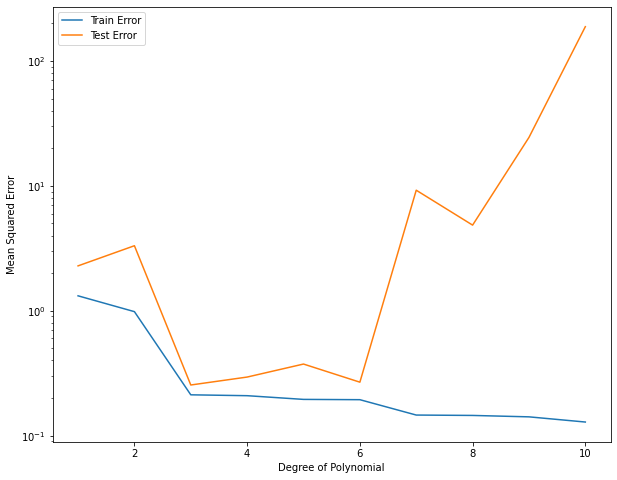

In [ ]:
#Test Error vs. Degree, Train Error vs. Degree
train_errors, true_errors = [], []

for degree in range(1, 11):
    X_test = get_features(degree, x_test)
    X_train = get_features(degree, x_train)
    ### BEGIN CODE ###
    w = ols(X_train, y_train)
    y_pred = X_test@w
    y_pred_data = X_train@w

    train_errors.append(mse(y_pred_data, y_train))
    true_errors.append(mse(y_pred, y_test))
    ### END CODE ###

plt.figure(figsize=(10, 8))
plt.yscale("log")
plt.plot(range(1, 11), train_errors, label = "Train Error")
plt.plot(range(1, 11), true_errors, label = "Test Error")
plt.legend()
plt.ylabel("Mean Squared Error")
plt.xlabel("Degree of Polynomial")

**1.4.2. From the plot above, what do you notice about the training and test errors as the degree increases? Does this align with the learned function you saw in the previous cell?**

YOUR ANSWER HERE: As the degree increases, the training error goes down overall. For degree greater than 6, we can see that the test error actually starts to increase. This makes sense given the previous cell as we saw that the learned function for degree > 6 was quite bad for values of x greater than 0.5

In most real world situations, we won't know details about the true underlying function. In this case, that could mean we don't know what the degree of the true polynomial function is. Let's guess that it is a degree 7 polynomial and see what happens with running Polynomial Regression with OLS.

**1.4.3. Implement the code below and graph the resulting function from running Polynomial Regression with OLS with a 7 degree polynomial:**

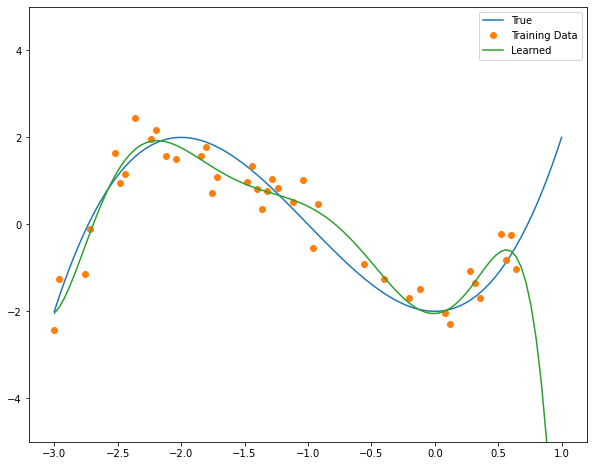

Weight Vector [-2.05067663  0.11158767  7.23500763  2.36814024 -7.72278608 -7.84260951
 -2.73664038 -0.32646127]
Norm of Weight Vector: 13.81719494826317


In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(x_range, func(x_range), label='True')
plt.plot(x_train, y_train, 'o', label='Training Data')

D = 7

X_range = get_features(D, x_range)
### BEGIN CODE ###
X_train = get_features(D, x_train)
w = ols(X_train, y_train)
### END CODE ###
y_pred = X_range@w

plt.plot(x_range, y_pred, label='Learned')
plt.ylim(-5, 5)
plt.legend()
plt.show()
print("Weight Vector", w)
print("Norm of Weight Vector:", np.linalg.norm(w))

Notice that degree 7 polynomial regression with OLS doesn't perform very well given these training points. In the next section, we will introduce a slight variation of OLS called Ridge Regression that can help us fix this problem.